In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Um passo do método Runge Kutta de ordem 4
def runge_kutta_4_step(f,y0,t0,h):
    #y0 = np.array(y0)
    
    k1 = f(y0,t0)
    k2 = f(y0 + (h/2)*k1, t0 + h/2)
    k3 = f(y0 + (h/2)*k2, t0 + h/2)
    k4 = f(y0 + h*k3, t0 + h)

    y0 = y0 + h*(k1 + 2*k2 + 2*k3 + k4)/6
    t0 = t0 + h
        
    return [y0,t0]

def rg4(f,y0,t0,h,tmax):
    ts   = np.array([t0])
    ys   = np.array([y0])

    while (t0<tmax):
        (y0,t0) = runge_kutta_4_step(f,y0,t0,h)
        ts = np.append(ts,t0)
        ys = np.concatenate((ys,np.array([y0])))
    ys = ys.T

    return [ts,ys]

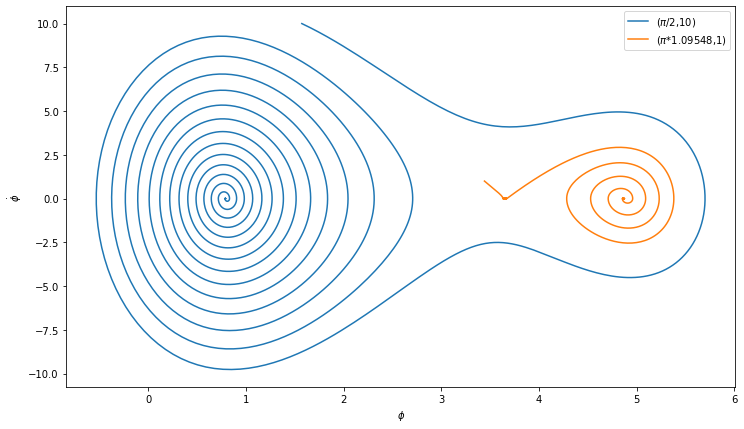

In [424]:
zeta = 2.368e-5 #kgm^2/s
I  = 1.738e-4 #kgm^2
k  = 2.47 #N/m
d  = 4.8e-2 #m
D  = 9.5e-2 #m
m  = 1.47e-2 #kg
g  = 9.81 #m/s^2
a  = 1.6e-1 #m 
b  = 6.0e-2 #m
q  = 1e6
omega = np.pi

mu = 1.272e-4 #Nm

def model(x,t):
    K = (2/np.pi)*mu*np.arctan(q*x[1])
    
    one = x[1]
    
    force=(k*d/(2*I))*(np.sqrt(a**2 + b**2 - 2*a*b*np.cos(omega)) - (a-b))
    two = force - (zeta/I)*x[1] - (k*(d**2)/(2*I))*x[0] - K/I - (m*g*D*np.sin(x[0])/(2*I))
#     three = omega
    return np.array([one,two])#,three])

t0 = 0
tmax = 100
h = 0.009
yy = np.array([.05, .05])
y0 = np.array([np.pi/2, 10])#,5.61])
y0n= np.array([np.pi*1.2, 1])
y0nn= np.array([np.pi*1.09548, 1])

_, answ = rg4(model,yy,t0,h,tmax)
time, ans = rg4(model,y0,t0,h,tmax)
_,ans1= rg4(model,y0n,t0,h,tmax)
_,ans2= rg4(model,y0nn,t0,h,tmax)
plt.figure(figsize=(12,7))

# plt.plot(answ[0],answ[1],label="(0.05,0.05)")
plt.plot(ans[0],ans[1],label="($\pi$/2,10)")
# plt.plot(ans1[0],ans1[1],label="($\pi$*1.2,1)")
plt.plot(ans2[0],ans2[1],label="($\pi$*1.09548,1)")
plt.xlabel("$\\phi$")
plt.ylabel("$\dot{\phi}$")
plt.legend()

In [425]:
def func(x,omga):
    return x + (m*g*D/(k*(d**2)))*np.sin(x) - (k*d/(2*I))*(np.sqrt(a**2 + b**2 - 2*a*b*np.cos(omga)) - (a-b))

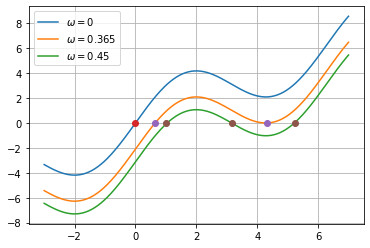

In [489]:
sample = np.linspace(-3,7,300)
plt.plot(sample,func(sample,0),label="$\omega=0$")
plt.plot(sample,func(sample,0.365),label="$\omega=0.365$")
plt.plot(sample,func(sample,0.45),label="$\omega=0.45$")
plt.plot([0],[0],"o")
plt.plot([0.65,4.33],[0,0],"o")
plt.plot([1,3.16,5.24],[0,0,0],"o")
plt.legend()
plt.grid()

In [357]:
answ[0][-1],answ[1][-1]

(3.048086437082392e-06, -3.6493873026576084e-10)

In [358]:
ans[0][-1],ans[1][-1]

(-3.048086437082392e-06, 3.6493873026576084e-10)

In [326]:
def pe(x,t):
    a=x[1]
    b=-(g/L)*np.sin(x[0])-alpha*x[1]
    return np.array([a,b])
g=9.81
L=1
alpha=0.04

t0 = 0
tmax = 100
h = 0.02
y0 = np.array([np.pi/2, 25,5.61])
y0s = np.array([np.pi/64,1/32])
# omega = 1.12

time, ans = rg4(pe,np.array([np.pi+0.0001,0]),t0,h,130)
time, ans1 = rg4(pe,np.array([-np.pi-0.0001,0]),t0,h,130)
_, ans2 = rg4(pe,np.array([np.pi-0.0001,0]),t0,h,130)
_, ans2e = rg4(pe,np.array([10,10]),t0,h,130)

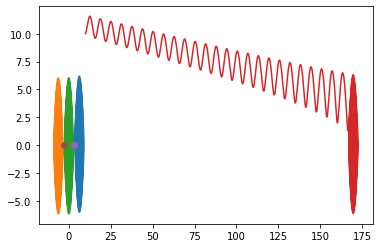

In [327]:
plt.plot(ans[0],ans[1])
plt.plot(ans1[0],ans1[1])
plt.plot(ans2[0],ans2[1])
plt.plot(ans2e[0],ans2e[1])
plt.plot(np.pi,0,"o")
plt.plot(-np.pi,0,"o")

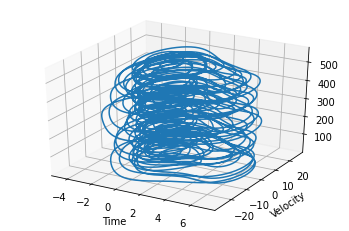

In [82]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.plot(ans[0], ans[1], ans[2])
plt.xlabel("Time")
plt.ylabel("Velocity")
# plt.zlabel("Force")

plt.show() 
# plt.plot(ans[0],ans[1])

In [76]:
ae,be = runge_kutta_4_step(model,y0,t0,h)

In [43]:
t0 = 0
y0 = np.array([0.1,0.1])

ts = []
ys = []

for _ in range(50000):
    y0,t0 = runge_kutta_4_step(model,y0,t0,h)
    ys.append(y0)
    ts.append(t0)
ys = np.array(ys)
ys = ys.T

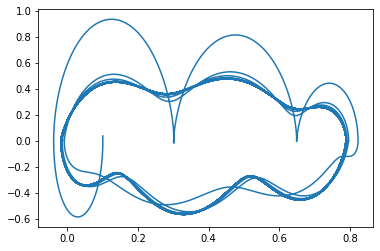

In [44]:
plt.plot(ys[0],ys[1])

In [364]:
import sympy as smp

In [365]:
k,d,I,m,g,D,xi,mu,q,phi,psi,theta,x0,L,alpha,omega,a,b,pi = smp.symbols('k d I m g D xi mu q phi psi theta x_0 L alpha omega a b pi',real=True)

In [418]:
M=smp.Matrix([[0,1],
           [-(k*(d**2))/(2*I)-(m*g*D*smp.cos(phi))/(2*I), -xi/I - (2*mu*q)/((I*pi)*((q*psi)**2+1))]])

In [419]:
M

Matrix([
[                                   0,                                       1],
[-D*g*m*cos(phi)/(2*I) - d**2*k/(2*I), -2*mu*q/(I*pi*(psi**2*q**2 + 1)) - xi/I]])

In [387]:
M.subs([(phi,0),(psi,0),(I,1.738e-4),(D,9.5e-2),(d,4.8e-2),(g,9.81),(xi,2.368e-5),(mu,1.272e-4),(k,2.47),(m,1.47e-2),(q,10**6),(pi,smp.pi)]).eigenvals()

{-0.000119727153936816: 1, -465926.689898434: 1}

In [368]:
new_M=M.subs([(I,1.738e-4),(D,9.5e-2),(d,4.8e-2),(g,9.81),(xi,2.368e-5),(mu,1.272e-4),(k,2.47),(m,1.47e-2),(q,10**6)])

In [369]:
eig1,eig2=M.eigenvals()

In [370]:
eig1.subs([(g,9.81),(mu,1.272e-4),(q,1e6),(I,1.738e-4),(D,9.5e-2),(d,4.8e-2),(k,2.47),(m,1.47e-2),(xi,2.368e-5),(phi,0)])

-2876.86996547756*(2.368e-5*pi + 254.4)/pi - 731875.719217491*sqrt(-1.04144315425863e-10*pi**2 + (9.30817610062893e-8*pi + 1)**2)/pi

In [371]:
eig2.subs([(g,9.81),(mu,1.272e-4),(q,1e6),(I,1.738e-4),(D,9.5e-2),(d,4.8e-2),(k,2.47),(m,1.47e-2),(xi,2.368e-5),(phi,0)])

-2876.86996547756*(2.368e-5*pi + 254.4)/pi + 731875.719217491*sqrt(-1.04144315425863e-10*pi**2 + (9.30817610062893e-8*pi + 1)**2)/pi

In [388]:
f1 = smp.Function('f_1')(phi,psi,omega)
f2 = smp.Function('f_2')(phi,psi,omega)
f3 = smp.Function('f_3')(phi,psi,omega)

In [389]:
f1=psi
f2=(k*d/(2*I))*(smp.sqrt(a**2 + b**2 - 2*a*b*smp.cos(omega)) - (a-b)) -(xi/I)*psi - (k*d**2)/(2*I) * phi - (2*mu)/(I*pi) * smp.atan(q*psi) - (m*g*D)/(2*I) * smp.sin(phi)
f3=omega

x1=theta
x2=-(g/L)*smp.sin(x0) - alpha*theta

In [390]:
X = smp.Matrix([f1,f2])
Y = smp.Matrix([phi,psi])

In [391]:
N=X.jacobian(Y)

In [392]:
f2

-D*g*m*sin(phi)/(2*I) - d**2*k*phi/(2*I) + d*k*(-a + b + sqrt(a**2 - 2*a*b*cos(omega) + b**2))/(2*I) - 2*mu*atan(psi*q)/(I*pi) - psi*xi/I

In [396]:
l1,l2=N.eigenvals()
l1.simplify()

-(2*mu*q + pi*psi**2*q**2*xi + pi*xi + sqrt(-2*D*I*g*m*pi**2*psi**4*q**4*cos(phi) - 4*D*I*g*m*pi**2*psi**2*q**2*cos(phi) - 2*D*I*g*m*pi**2*cos(phi) - 2*I*d**2*k*pi**2*psi**4*q**4 - 4*I*d**2*k*pi**2*psi**2*q**2 - 2*I*d**2*k*pi**2 + 4*mu**2*q**2 + 4*mu*pi*psi**2*q**3*xi + 4*mu*pi*q*xi + pi**2*psi**4*q**4*xi**2 + 2*pi**2*psi**2*q**2*xi**2 + pi**2*xi**2))/(2*I*pi*(psi**2*q**2 + 1))

In [416]:
l1.subs([(q,1e6),(pi,np.pi),(g,9.81),(phi,0),(psi,0),(I,1.738e-4),(D,9.5e-2),(d,4.8e-2),(k,2.47),(m,1.47e-2),
        (xi,2.368e-5),(mu,1.272e-39)])

-0.0681242807825086 - 7.46856315546096*I

In [383]:
f1=psi
f2=-(xi/I)*psi - (k*d**2)/(2*I) * phi - (2*mu)/(I*np.pi) * smp.atan(q*psi) - (m*g*D)/(2*I) * smp.sin(phi)
f3=omega
X = smp.Matrix([f1,f2,f3])
N=X.jacobian(Y)
N.subs([(g,9.81),
        (mu,1.272e-4),
        (q,1e6),
        (I,1.738e-4),
        (D,9.5e-2),
        (d,4.8e-2),
        (k,2.47),
        (m,1.47e-2),
        (xi,2.368e-5),
        (phi,0),
        (psi,0)]).eigenvals()

{-0.000119727153936816: 1, -465926.689898434: 1, 1.00000000000000: 1}

In [146]:
Ev.eigenvals()

{-0.318309886183791*(1.0*mu*q + 3.71964570185031e-5)/I - 0.707106781186548*sqrt(-1.0*D*I*g*m - 1.0*I*d**2*k + 0.202642367284676*mu**2*q**2 + 1.50751562096643e-5*mu*q + 2.803712e-10)/I: 1,
 -0.318309886183791*(1.0*mu*q + 3.71964570185031e-5)/I + 0.707106781186548*sqrt(-1.0*D*I*g*m - 1.0*I*d**2*k + 0.202642367284676*mu**2*q**2 + 1.50751562096643e-5*mu*q + 2.803712e-10)/I: 1}

In [189]:
pol=N.charpoly()

In [190]:
pol

PurePoly(1.0*lambda**2 + (0.636619772367581*mu*q + 1.0*psi**2*q**2*xi + 1.0*xi)/(1.0*I*psi**2*q**2 + 1.0*I)*lambda + 0.5*(1.0*D*g*m*cos(phi) + 1.0*d**2*k)/I, lambda, domain='RR(q,d,g,k,m,D,I,cos(phi),mu,psi,xi)')

In [485]:
def lom(phi,psi):
    prima=-zeta/I - (2*mu*q)/(I*np.pi*((q**2)*(psi**2)+1))
    secunda=np.sqrt((-prima)**2 - 4*((k*(d**2)/(2*I)) + (m*g*D*np.cos(phi))/(2*I)))
    return ((prima+secunda)/2,(prima-secunda)/2)

In [486]:
lom(0,0)

(-0.00011972713400609791, -465926.68989843375)